### **Linear Regression**


1.   Import and preprocess the dataset.
2.   Split data into train-test sets.
3.   Fit a Linear Regression model using sklearn.linear_model.
4.   Evaluate model using MAE, MSE, R².
5.   Plot regression line and interpret coefficients.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Housing.csv")

In [3]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Preprocessing (One hot encoding)

In [5]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(data.head())
print(data.info())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

Boolean values to integers

In [6]:
data = data.astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    int64
 7   guestroom_yes                    545 non-null    int64
 8   basement_yes                     545 non-null    int64
 9   hotwaterheating_yes              545 non-null    int64
 10  airconditioning_yes              545 non-null    int64
 11  prefarea_yes                     545 non-null    int64
 12  furnishingstatus_semi-furnished  545 non-null    i

Handling outliners

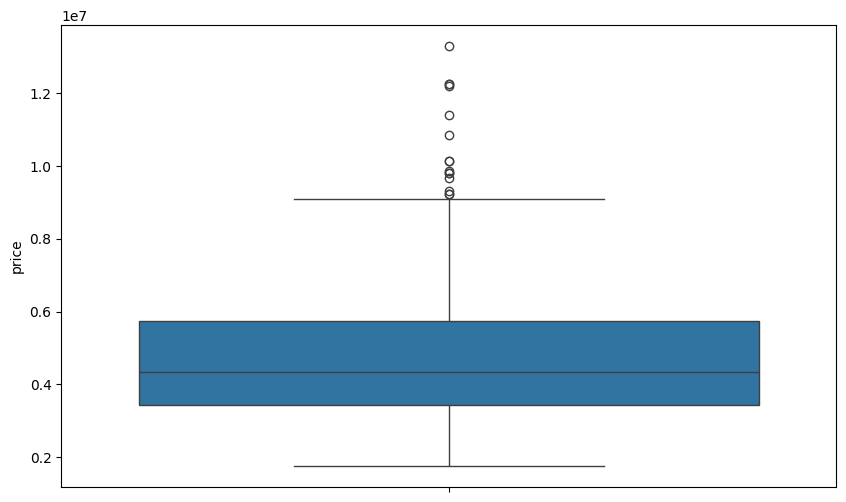

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data['price'])
plt.show()

In [8]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR
filtered_data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]


In [9]:
X = filtered_data.drop(columns=['price'])
y = filtered_data['price']

Variance Inflation Factors

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [15]:
X_const = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factors:")
print(vif.sort_values(by="VIF", ascending=False))


Variance Inflation Factors:
                            Feature        VIF
0                             const  34.924151
13     furnishingstatus_unfurnished   1.685585
12  furnishingstatus_semi-furnished   1.598386
4                           stories   1.457956
2                          bedrooms   1.346614
8                      basement_yes   1.318683
1                              area   1.307178
3                         bathrooms   1.248668
7                     guestroom_yes   1.223614
10              airconditioning_yes   1.187271
5                           parking   1.187014
6                      mainroad_yes   1.173836
11                     prefarea_yes   1.139439
9               hotwaterheating_yes   1.031137


Split data into train and test

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Model evaluation using MAE, MSE, R²

In [19]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 784877.2641074922
Mean Squared Error (MSE): 1148203524699.7427
R² Score: 0.6684003582833372


Plot regression line and interpret coefficients.

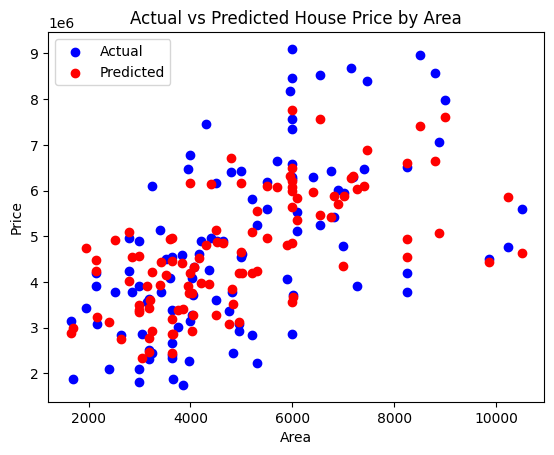

In [20]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Price by Area')
plt.legend()
plt.show()


In [21]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))



Feature Coefficients:
                            Feature    Coefficient
2                         bathrooms  811994.474386
8               hotwaterheating_yes  799472.324288
9               airconditioning_yes  763325.214818
10                     prefarea_yes  582649.815567
3                           stories  412331.226920
5                      mainroad_yes  406359.434878
6                     guestroom_yes  379603.441698
7                      basement_yes  316981.520631
4                           parking  169705.311267
1                          bedrooms  101584.494989
0                              area     199.970030
11  furnishingstatus_semi-furnished  -85352.030777
12     furnishingstatus_unfurnished -328577.537345
